<a href="https://colab.research.google.com/github/githinjimary/DSI.2022/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import turtle

In [ ]:
try:
    bob = turtle.Turtle()
except:
    bob = turtle.Turtle()

In [ ]:
bob.color("blue")

for num in range(6):
    print(num)
    bob.forward(100)
    bob.left(60)







turtle.done()

0
1
2
3
4
5


In [ ]:
!pip install numpy pandas scipy scikit-learn torch

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files_path = '/content/drive/MyDrive/DSI_Pre_Assignment_2022/'

# reading files
df0 = pd.read_csv(files_path+"title.akas.tsv.gz",compression='gzip',sep = '\t',low_memory = False)
df1 = pd.read_csv(files_path+"title.basics.tsv.gz",compression='gzip',sep = '\t',low_memory = False)
df2 = pd.read_csv(files_path+"title.ratings.tsv.gz",compression='gzip',sep = '\t',low_memory = False)

In [ ]:
df0.shape

(3423660, 8)

In [ ]:
df0.columns

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [ ]:
df0.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
df1.shape

(5330276, 9)

In [ ]:
df1.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [ ]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
df2.shape

(874203, 3)

In [ ]:
df2.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [ ]:
# question 2
df0.drop_duplicates(inplace=True)
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [ ]:
# inner merge
df_inner_1 = df0.merge(df1, how='inner', left_on='titleId', right_on='tconst')
df_inner = df_inner_1.merge(df2, how='inner', on='tconst')

In [ ]:
# outer merge
df_outer_1 = df0.merge(df1, how='outer', left_on='titleId', right_on='tconst')
df_outer = df_outer_1.merge(df2, how='outer', on='tconst')

In [ ]:
print(f'The shape of inner merge is {df_inner.shape} and  outer merge is {df_outer.shape}')

The shape of inner merge is (1686547, 19) and  outer merge is (6740089, 19)


In [ ]:
# unique method
titleTypes = df_outer['titleType'].unique()
titleTypes

array(['short', 'movie', nan, 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvShort', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'],
      dtype=object)

In [ ]:
# question 4
region = df_outer['region'] == 'US'
movie = df_outer['titleType'] == 'movie'
language = df_outer['language'] == 'en'

df_new = df_outer[language | region & movie]

df_new.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
51,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0
74,tt0000012,11.0,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
76,tt0000012,13.0,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
85,tt0000012,21.0,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
131,tt0000016,1.0,Boat Leaving the Port,XWW,en,\N,informal title,0,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short",5.9,967.0


In [ ]:
# questions 5

df_new['log10Votes'] = df_new['numVotes'].apply(lambda x: np.log10(x))

df_new.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
51,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0,1.845098
74,tt0000012,11.0,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
76,tt0000012,13.0,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
85,tt0000012,21.0,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
131,tt0000016,1.0,Boat Leaving the Port,XWW,en,\N,informal title,0,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short",5.9,967.0,2.985426


In [ ]:

df_new["genres"].str.lower()

51                   romance
74         documentary,short
76         documentary,short
85         documentary,short
131        documentary,short
                 ...        
3423618          documentary
3423633       comedy,romance
3423637          documentary
3423641                short
3423645                short
Name: genres, Length: 309870, dtype: object

In [ ]:
group_genre = df_new.groupby('genres')

# by logvotes 

group_log = group_genre['log10Votes'].mean().sort_values(ascending = False).head(10)
avg_rating = group_genre['averageRating'].mean().sort_values(ascending = False).head(10)
group_log

genres
Action,Fantasy,War            5.405722
Action,Family,Romance         4.801753
Family,Music,Musical          4.396252
Documentary,Sport,Thriller    4.386731
Horror,Musical,Sci-Fi         4.340484
Biography,Fantasy,Horror      4.271842
Animation,Drama,War           4.137558
Comedy,Crime,Sport            4.112184
Action,Adventure,Sci-Fi       4.064078
Adventure,Drama,Sci-Fi        4.033407
Name: log10Votes, dtype: float64

In [ ]:
# averge rating
avg_rating

genres
Documentary,History,Western    9.300000
History,Sport                  9.200000
Documentary,News,Reality-TV    9.150000
Action,Musical,Short           9.100000
Action,Fantasy,Short           9.000000
Biography,Comedy,Sci-Fi        9.000000
Crime,Reality-TV               8.966667
Comedy,Reality-TV,Talk-Show    8.800000
Short,Thriller,War             8.700000
Action,Biography,Short         8.600000
Name: averageRating, dtype: float64

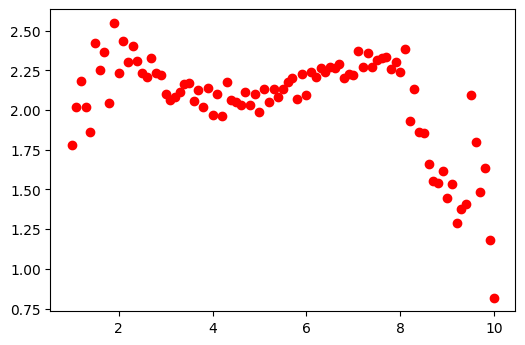

In [ ]:
group_avg = df_new.groupby('averageRating').mean()

plt.figure(figsize=(6,4),dpi = 100)
plt.scatter(x = group_avg.index, y = group_avg['log10Votes'],color = 'red')

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array([num for num in group_avg.index]).reshape(-1,1)
y = [num for num in group_avg['log10Votes']]



reg = LinearRegression().fit(X, y)

NameError: ignored

In [ ]:
y

array([ 6,  8,  9, 11])